In [22]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor # Importing Regressor Functions for KNN and DT
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from plotnine import *

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [23]:
!pip install palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins()

# Dropping NA's
penguins= penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [24]:
#dummify all variables - species, island, sex (all objects)
ct = ColumnTransformer([
  ("dummify",
  OneHotEncoder(sparse_output = False, handle_unknown = "ignore"),
  make_column_selector(dtype_include=object)), #selecting all columns that are categorical

  ("standardize",
  StandardScaler(),
  make_column_selector(dtype_include=np.number)) #standardizing numerical variables
  ], remainder = "passthrough" #keep everything else
)

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [25]:
# Specifying X, Y, and split
X = penguins.drop(["bill_depth_mm"], axis = 1)
y = penguins["bill_depth_mm"]
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Best Multiple Linear Regression Model

In [26]:
lr = LinearRegression()

# Creating Pipeline
lr_pipeline = Pipeline(
    [('dummify_everything', ct),
     ('ols', lr)]
).set_output(transform = "pandas")

# Fitting Pipeline to Data
lr_fit = lr_pipeline.fit(X_train,y_train)

# Calculate the model predictions on the training data
y_train_ = lr_fit.predict(X=X_train)

# Finding RMSE of Training Data
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_train_)

rmse_train_lr = np.sqrt(mse_train)
print("Training RMSE:",rmse_train_lr)

# Finding RMSE of Validation Set

# Get model's predictions on validation set
y_test_ = lr_pipeline.predict(X_test)

rmse_val_lr = np.sqrt(mean_squared_error(y_test, y_test_))
print("Validation RMSE:",rmse_val_lr)

Training RMSE: 0.7598840154470529
Validation RMSE: 0.8226325090710827


# KNN Models

## KNN Model 1 (k=3)

In [27]:
# Creating Pipeline
knn_pipeline3 = Pipeline(
  [("preprocessing", ct),
   ("knn_regressor", KNeighborsRegressor(n_neighbors=3))] # Implementing KNN Classifier
).set_output(transform = "pandas")

# Fitting Pipeline
knn3_fit = knn_pipeline3.fit(X_train, y_train)

# Finding RMSE of Training Data

# Calculate the model predictions on the training data
y_train_knn3 = knn3_fit.predict(X=X_train)

from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_train_knn3)

rmse_train_knn3 = np.sqrt(mse_train)
print("Training RMSE:",rmse_train_knn3)

# Finding RMSE of Validation Set

# Get model's predictions on validation set
y_test_knn3 = knn3_fit.predict(X_test)

mse_val = mean_squared_error(y_test, y_test_knn3)

rmse_val_knn3 = np.sqrt(mse_val)
print("Validation RMSE:",rmse_val_knn3)

Training RMSE: 0.5998028829858999
Validation RMSE: 0.9293708402624646


## KNN Model 2 (k=10)

In [28]:
# Creating Pipeline
knn_pipeline10 = Pipeline(
  [("preprocessing", ct),
   ("knn_regressor", KNeighborsRegressor(n_neighbors=10))] # Implementing KNN Classifier
).set_output(transform = "pandas")

# Fitting Pipeline
knn10_fit = knn_pipeline10.fit(X_train, y_train)

# Finding RMSE of Training Data

# Calculate the model predictions on the training data
y_train_knn10 = knn10_fit.predict(X=X_train)

from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_train_knn10)

rmse_train_knn10 = np.sqrt(mse_train)
print("Training RMSE:",rmse_train_knn10)

# Finding RMSE of Validation Set

# Get model's predictions on validation set
y_test_knn10 = knn10_fit.predict(X_test)

mse_val = mean_squared_error(y_test, y_test_knn10)

rmse_val_knn10 = np.sqrt(mse_val)
print("Validation RMSE:",rmse_val_knn10)

Training RMSE: 0.7141161301844108
Validation RMSE: 0.803946367554927


# Decision Tree Models

## Decision Tree Model 1 (max_depth=3)

In [29]:
# Creating Pipeline
clf_pipeline3 = Pipeline(
  [("preprocessing", ct),
   ("decision_tree", DecisionTreeRegressor(max_depth=3))] # Implementing Decision Tree
).set_output(transform = "pandas")

# Fitting Pipeline
clf3_fit = clf_pipeline3.fit(X_train, y_train)

# Finding RMSE of Training Data

# Calculate the model predictions on the training data
y_train_clf3 = clf3_fit.predict(X=X_train)

from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_train_clf3)

rmse_train_clf3 = np.sqrt(mse_train)
print("Training RMSE:",rmse_train_clf3)

# Finding RMSE of Validation Set

# Get model's predictions on validation set
y_test_clf3 = clf3_fit.predict(X_test)

mse_val = mean_squared_error(y_test, y_test_clf3)

rmse_val_clf3 = np.sqrt(mse_val)
print("Validation RMSE:",rmse_train_clf3)

Training RMSE: 0.7382287261410708
Validation RMSE: 0.7382287261410708


## Decision Tree Model 2 (max_depth=10)

In [16]:
# Creating Pipeline
clf_pipeline10 = Pipeline(
  [("preprocessing", ct),
   ("decision_tree", DecisionTreeRegressor(max_depth=10))] # Implementing Decision Tree
).set_output(transform = "pandas")

# Fitting Pipeline
clf10_fit = clf_pipeline10.fit(X_train, y_train)

# Finding RMSE of Training Data

# Calculate the model predictions on the training data
y_train_clf10 = clf10_fit.predict(X=X_train)

from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_train_clf10)

rmse_train_clf10 = np.sqrt(mse_train)
print("Training RMSE:",rmse_train_clf10)

# Finding RMSE of Validation Set

# Get model's predictions on validation set
y_test_clf10 = clf10_fit.predict(X_test)

mse_val = mean_squared_error(y_test, y_test_clf10)

rmse_val_clf10 = np.sqrt(mse_val)
print("Validation RMSE:",rmse_val_clf10)

Training RMSE: 0.15696779570628133
Validation RMSE: 0.15696779570628133


# Creating Plot

In [34]:
# Creating dataframe with Training/Validation RMSE
model_type = ["lr", "knn3", "knn10", "decision_tree"]
features = [7, 7, 7, 7]
rmse_train = [rmse_train_lr, rmse_train_knn3, rmse_train_knn10, rmse_train_clf3]
rmse_test = [rmse_val_lr,rmse_val_knn3,rmse_val_knn10,rmse_val_clf3]
rmse_df = pd.DataFrame({"model": model_type,
                       "features": features,
                       "rmse_train": rmse_train,
                       "rmse_test": rmse_test})
rmse_df

,model,features,rmse_train,rmse_test
0,lr,7,0.759884,0.822633
1,knn3,7,0.599803,0.929371
2,knn10,7,0.714116,0.803946
3,decision_tree,7,0.738229,0.875778


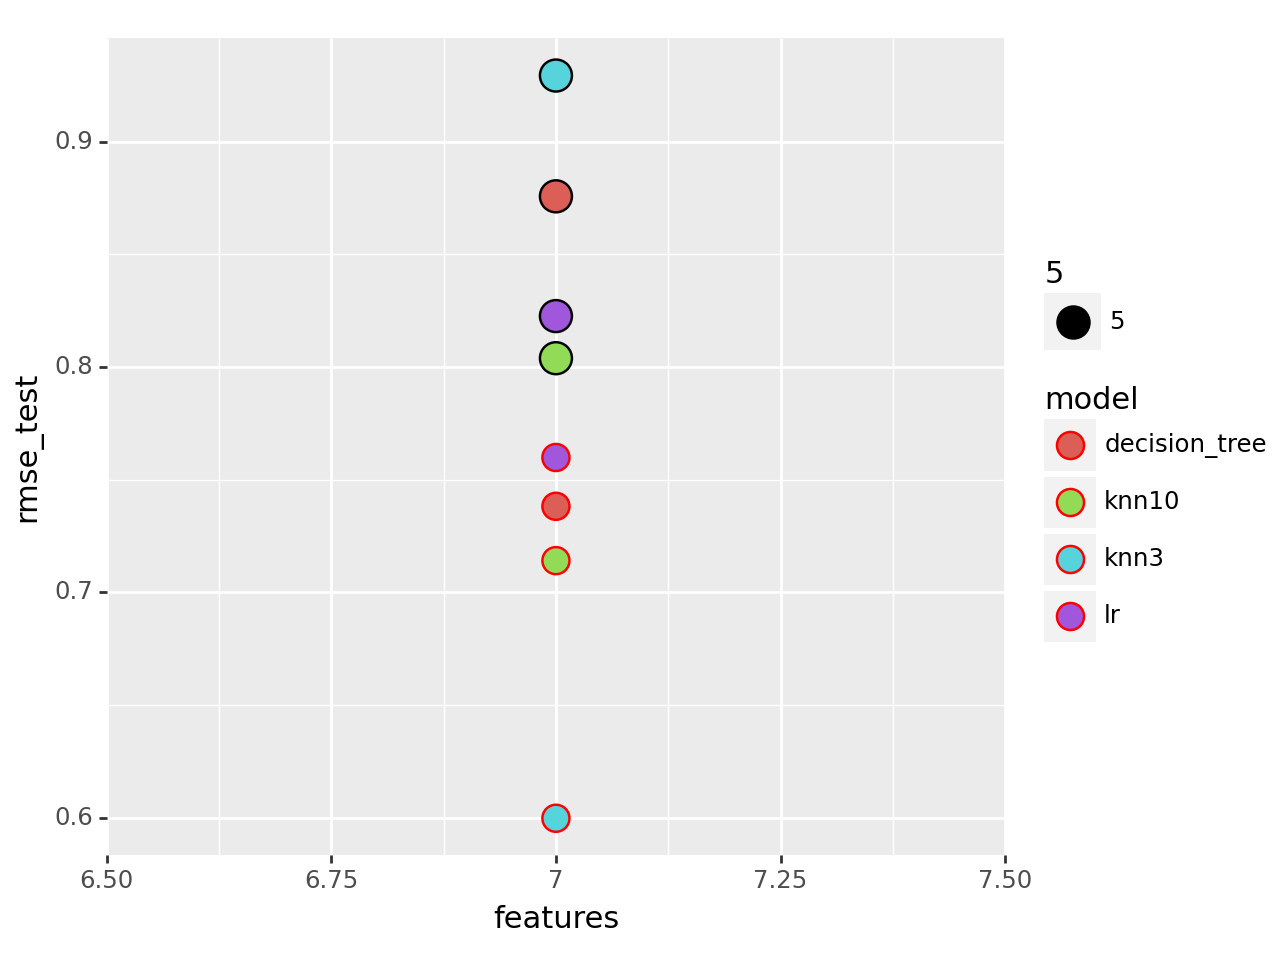

<Figure Size: (640 x 480)>

In [35]:
# Plotr
(ggplot(rmse_df,
        aes(x = "features", fill = "model"))
+ geom_point(aes(y = "rmse_test", size = 5))
+ geom_point(aes(y = "rmse_train"), color = "red", size = 5))